## Please follow the below structure while attempting the hackathon, make sure to submit the jupyter file as well for every submission you are making.

## Please answer the descriptive question in the Jupyter Notebook Itself. This is going to carry more weightage in the final evaluation.

## Importing Necessary Libraries

In [84]:
import numpy as np
import pandas as pd

In [85]:
df_train = pd.read_csv('Train_Set_TVS.csv')
df_test = pd.read_csv('Test_Set_TVS.csv')

In [86]:
df_train.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,...,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,...,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,...,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,...,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,...,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [87]:
df_test.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,...,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,...,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,...,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,...,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,...,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0


In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  int64  
 1   Compensation        126198 non-null  float64
 2   Vehicle_Status      123336 non-null  object 
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         127829 non-null  float64
 5   density_Ind         127024 non-null  float64
 6   Job_Type            122192 non-null  object 
 7   Default_hist        132440 non-null  object 
 8   Prop_List           130475 non-null  object 
 9   Home_Appliances     121476 non-null  float64
 10  Region_Type         132440 non-null  object 
 11  Credit_Inq          129750 non-null  object 
 12  Education_det       132440 non-null  object 
 13  Marital_Stat        132440 non-null  object 
 14  Gen                 132440 non-null  object 
 15  Credit_Lnks         132440 non-nul

In [89]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  56760 non-null  int64  
 1   Compensation        54010 non-null  float64
 2   Vehicle_Status      52877 non-null  object 
 3   Loan_amt            56760 non-null  float64
 4   Annuity_amt         54797 non-null  float64
 5   density_Ind         54485 non-null  float64
 6   Job_Type            52440 non-null  object 
 7   Default_hist        56760 non-null  object 
 8   Prop_List           55849 non-null  object 
 9   Home_Appliances     52001 non-null  float64
 10  Region_Type         56760 non-null  object 
 11  Credit_Inq          55594 non-null  object 
 12  Education_det       56760 non-null  object 
 13  Marital_Stat        56760 non-null  object 
 14  Gen                 56760 non-null  object 
 15  Credit_Lnks         56760 non-null  object 
 16  Expe

In [90]:
df_train.isnull().sum()

ID                        0
Compensation           6242
Vehicle_Status         9104
Loan_amt                  0
Annuity_amt            4611
density_Ind            5416
Job_Type              10248
Default_hist              0
Prop_List              1965
Home_Appliances       10964
Region_Type               0
Credit_Inq             2690
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience            21845
Income_Alt             7682
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating        11731
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated              17513
c2_rated              13321
Contact_age            8153
Product_bought            0
Default                   0
dtype: int64

In [91]:
df_test.isnull().sum()

ID                       0
Compensation          2750
Vehicle_Status        3883
Loan_amt                 0
Annuity_amt           1963
density_Ind           2275
Job_Type              4320
Default_hist             0
Prop_List              911
Home_Appliances       4759
Region_Type              0
Credit_Inq            1166
Education_det            0
Marital_Stat             0
Gen                      0
Credit_Lnks              0
Experience            9351
Income_Alt            3299
Day_Process              0
Ph.No                    0
Type_Loan                0
Dependents               0
Company_Rating        5053
Region                   0
Age                      0
hour_Process             0
Addr_permanent           0
Permanent_Addr_tag       0
c1_rated              7363
c2_rated              5655
Contact_age           3522
Product_bought           0
dtype: int64

In [92]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,132440.0,488938.279319,58568.207772,387652.0000,438095.5000,488952.5000,539702.0000,5.904070e+05
Compensation,126198.0,745051.897431,470276.230114,152728.0000,517706.0000,665996.0000,879489.0000,7.037702e+07
Loan_amt,132440.0,414801.133722,274678.779207,34275.0000,204529.9500,349542.5000,558205.0000,2.872142e+06
Annuity_amt,127829.0,10845.286442,2061.529355,5852.1000,9348.3700,10773.8200,12165.3900,4.130100e+04
density_Ind,127024.0,0.020446,0.015077,0.0001,0.0104,0.0204,0.0304,2.017800e+00
Home_Appliances,121476.0,3.220891,1.241751,1.0000,2.0000,4.0000,4.0000,1.900000e+01
Experience,110595.0,6.580616,6.357054,0.0000,2.1000,4.6000,9.0000,4.810000e+01
Dependents,132440.0,2.155467,0.909046,1.0000,2.0000,2.0000,3.0000,9.000000e+00
Company_Rating,120709.0,2.030553,0.503750,1.0000,2.0000,2.0000,2.0000,3.000000e+00
Age,132440.0,43.933260,11.962700,21.0000,34.0000,43.0000,54.0000,6.900000e+01


In [93]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,56760.0,489156.967089,58459.598434,387653.00,438878.0000,488939.5000,539700.5000,5.904010e+05
Compensation,54010.0,742311.044677,376480.936665,148330.00,516205.5000,666744.0000,877030.0000,1.727617e+07
Loan_amt,56760.0,414563.148217,275984.861035,34777.50,203558.7000,348862.8500,559860.7500,2.743640e+06
Annuity_amt,54797.0,10832.334840,2060.269444,6061.61,9344.3600,10756.4500,12142.3400,3.811600e+04
density_Ind,54485.0,0.020465,0.016790,0.00,0.0104,0.0203,0.0305,2.037200e+00
Home_Appliances,52001.0,3.220688,1.240932,1.00,2.0000,4.0000,4.0000,1.900000e+01
Experience,47409.0,6.590278,6.284459,0.00,2.2000,4.6000,9.0000,4.810000e+01
Dependents,56760.0,2.150828,0.909028,1.00,2.0000,2.0000,3.0000,9.000000e+00
Company_Rating,51707.0,2.028487,0.505052,1.00,2.0000,2.0000,2.0000,3.000000e+00
Age,56760.0,43.944327,11.979557,21.00,34.0000,43.0000,54.0000,6.900000e+01


## 1 Data Cleaning

In this section you can do all the Data cleaning part of all necessary imputations and treatments























In [94]:
df_train.drop('ID',axis = 1,inplace = True)
test_file_ids = df_test['ID'] 
df_test.drop('ID',axis = 1,inplace = True)

In [95]:
from sklearn.preprocessing import OneHotEncoder
LE = OneHotEncoder()

In [96]:
df = pd.get_dummies(df_train,drop_first = True)

In [97]:
df1 = pd.get_dummies(df_test,drop_first = True)

In [98]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')

In [99]:
imr = imputer.fit(df)
df = pd.DataFrame(imr.transform(df), columns=df.columns)

In [100]:
imr = imputer.fit(df1)
df1 = pd.DataFrame(imr.transform(df1), columns=df1.columns)

In [101]:
df.isnull().sum()

Compensation              0
Loan_amt                  0
Annuity_amt               0
density_Ind               0
Home_Appliances           0
Experience                0
Dependents                0
Company_Rating            0
Age                       0
hour_Process              0
c1_rated                  0
c2_rated                  0
Contact_age               0
Product_bought            0
Default                   0
Vehicle_Status_Y          0
Job_Type_IT               0
Job_Type_Non-IT           0
Default_hist_ndf          0
Prop_List_None            0
Prop_List_One             0
Region_Type_Rural         0
Region_Type_other         0
Credit_Inq_2              0
Credit_Inq_3              0
Credit_Inq_>4             0
Education_det_Other       0
Education_det_P_Grad      0
Marital_Stat_Married      0
Marital_Stat_Single       0
Marital_Stat_Widow        0
Gen_M                     0
Credit_Lnks_4_to_6        0
Credit_Lnks_>6            0
Income_Alt_Y              0
Day_Process_SAT     

In [102]:
df1.isnull().sum()

Compensation              0
Loan_amt                  0
Annuity_amt               0
density_Ind               0
Home_Appliances           0
Experience                0
Dependents                0
Company_Rating            0
Age                       0
hour_Process              0
c1_rated                  0
c2_rated                  0
Contact_age               0
Product_bought            0
Vehicle_Status_Y          0
Job_Type_IT               0
Job_Type_Non-IT           0
Default_hist_ndf          0
Prop_List_None            0
Prop_List_One             0
Region_Type_Rural         0
Region_Type_other         0
Credit_Inq_2              0
Credit_Inq_3              0
Credit_Inq_>4             0
Education_det_Other       0
Education_det_P_Grad      0
Marital_Stat_Married      0
Marital_Stat_Single       0
Marital_Stat_Widow        0
Gen_M                     0
Credit_Lnks_4_to_6        0
Credit_Lnks_>6            0
Income_Alt_Y              0
Day_Process_SAT           0
Day_Process_Sun     

# Insight

First use One hot Encoding to make dummy variables and then by using Simple Imputer mean Strategy impute the null values.

## 2 Exploratory Data Analyis

In this section you can talk about the plots and the insights you have generated from the data

























# Heatmap

In [20]:
import matplotlib.pyplot as plt   
import seaborn as sns

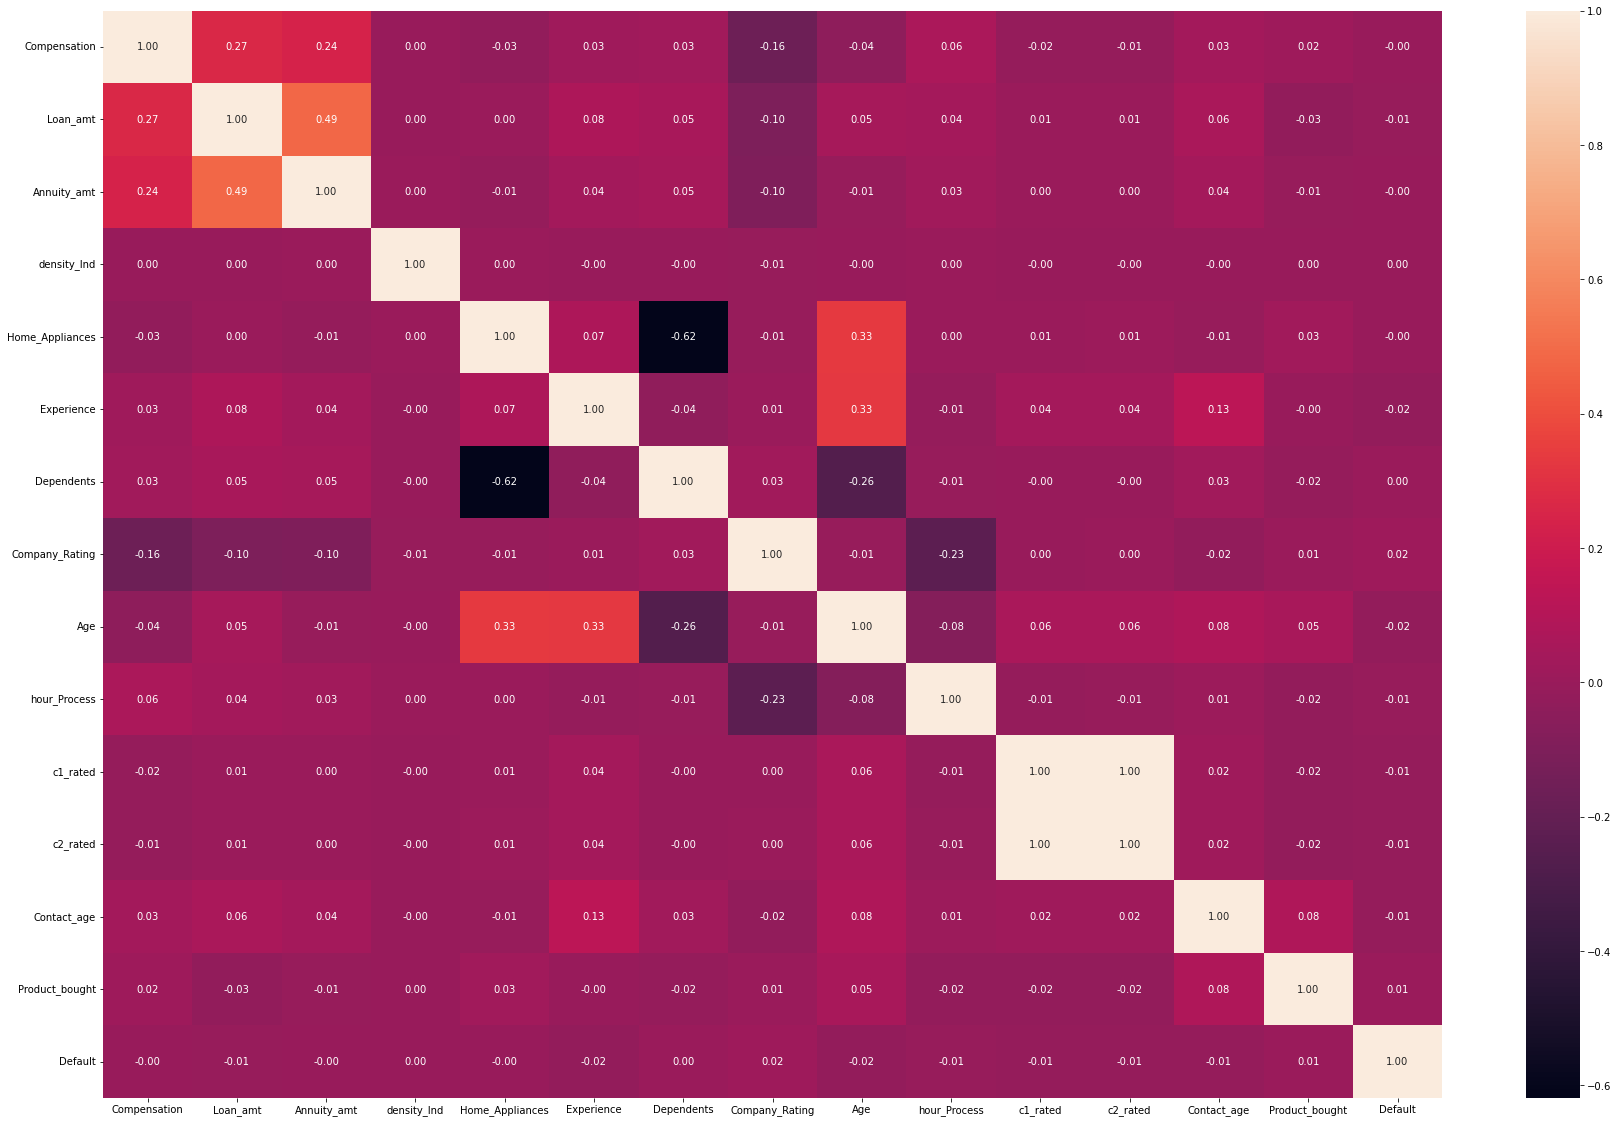

In [21]:
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(),annot=True,fmt=".2f");

# Pairplot

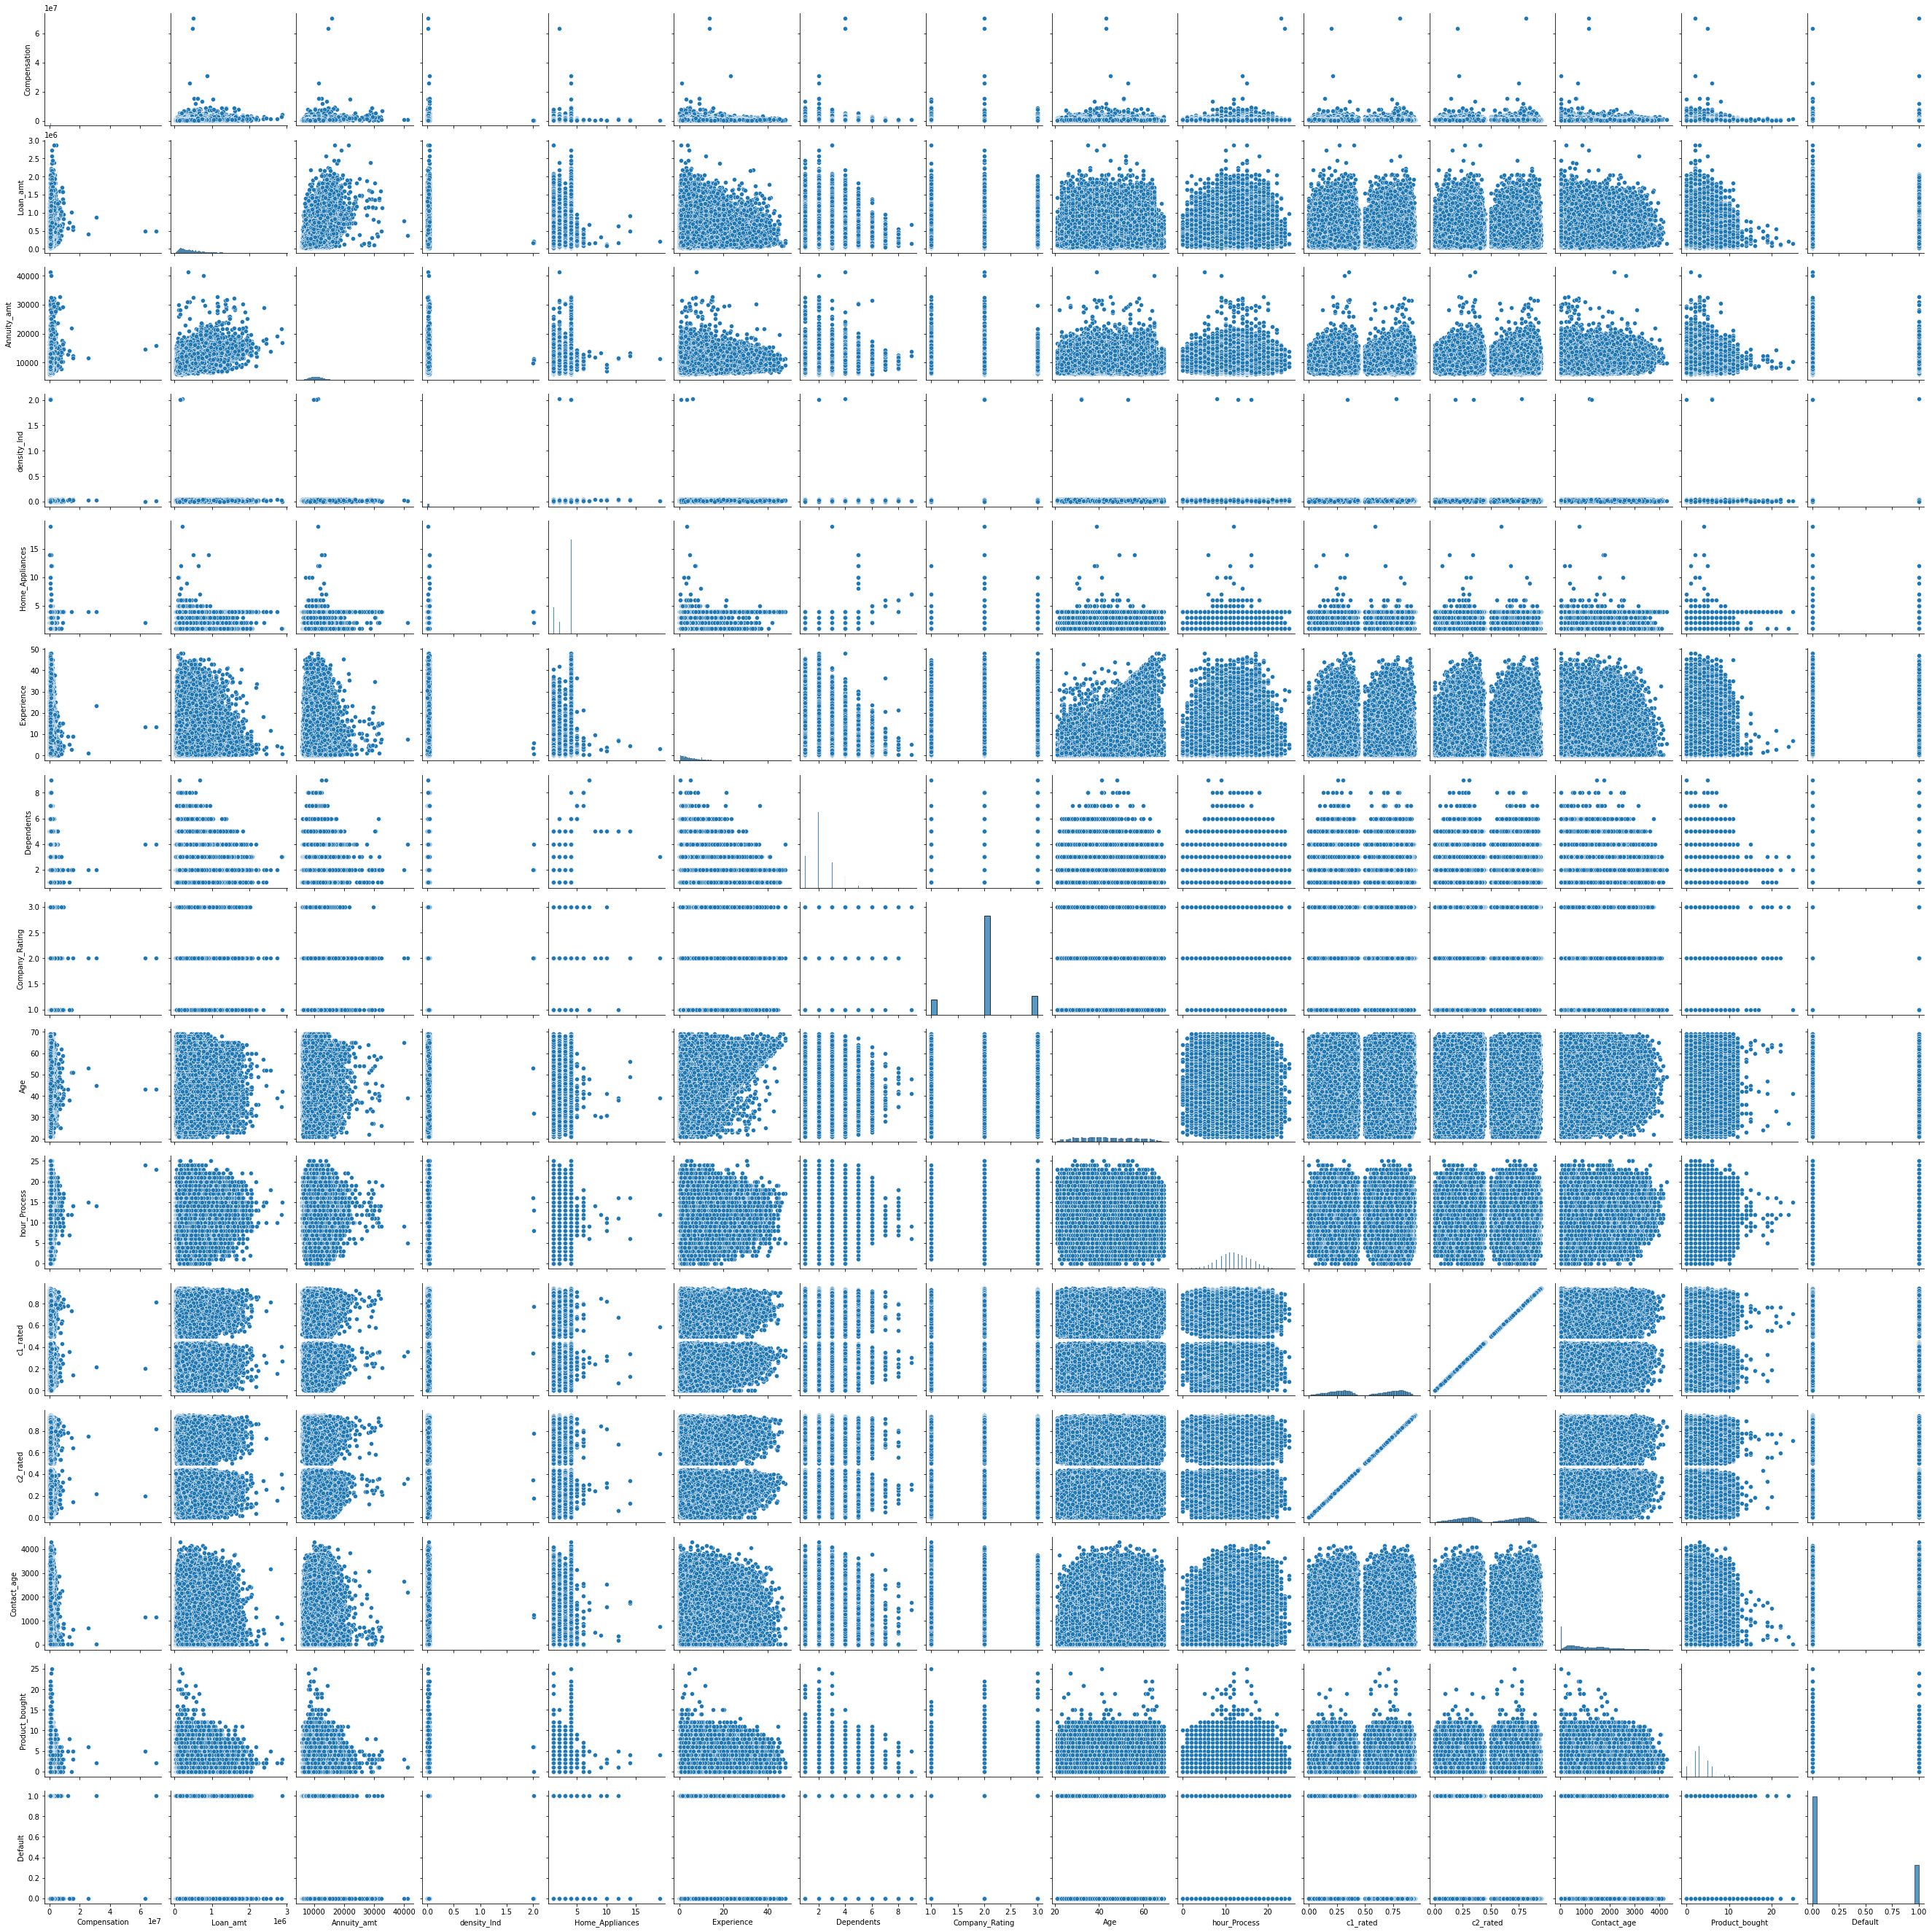

In [22]:
sns.pairplot(df_train)

# Insight

The Default Variables are not correlated to other.

## 3 Model Building

In this you can build various ML models and try tuning the parameters involved to achieve better score

In [103]:
X = df.drop('Default',axis = 1)
y = df['Default']

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

## Model 1 -- Decision Tree

In [197]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'log_loss' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss')

In [198]:
y_predict = dt_model.predict(X_test)

In [199]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

In [200]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68168
         1.0       1.00      1.00      1.00     24540

    accuracy                           1.00     92708
   macro avg       1.00      1.00      1.00     92708
weighted avg       1.00      1.00      1.00     92708



In [201]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73     29268
         1.0       0.26      0.28      0.27     10464

    accuracy                           0.60     39732
   macro avg       0.50      0.50      0.50     39732
weighted avg       0.61      0.60      0.61     39732



## Model 2 --  Random Forest

In [189]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=7,random_state=0)
rf_model.fit(X_train,y_train)
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

In [190]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     68168
         1.0       1.00      0.00      0.00     24540

    accuracy                           0.74     92708
   macro avg       0.87      0.50      0.42     92708
weighted avg       0.81      0.74      0.62     92708



In [191]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     29268
         1.0       0.00      0.00      0.00     10464

    accuracy                           0.74     39732
   macro avg       0.37      0.50      0.42     39732
weighted avg       0.54      0.74      0.62     39732



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 3--  Logistic Regression

In [175]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=10000,verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:  1.0min finished


LogisticRegression(max_iter=10000, n_jobs=2, verbose=True)

In [176]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)
ytest_predict_prob=model.predict_proba(X_test)

In [177]:
print(classification_report(y_train, ytrain_predict))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     68168
         1.0       0.00      0.00      0.00     24540

    accuracy                           0.74     92708
   macro avg       0.37      0.50      0.42     92708
weighted avg       0.54      0.74      0.62     92708



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [178]:
print(classification_report(y_test, ytest_predict))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     29268
         1.0       0.00      0.00      0.00     10464

    accuracy                           0.74     39732
   macro avg       0.37      0.50      0.42     39732
weighted avg       0.54      0.74      0.62     39732



# Insight

The highest accuracy is 74% of Random Forest and Logistic Reggresion but for pridiction we use Decision Tree as the model.

In [161]:
final_predictions = dt_model.predict(df1)
submission=pd.DataFrame([test_file_ids,final_predictions]).T
submission.rename(columns={"ID": "Default"},inplace=True)
submission.to_csv('Default.csv',index = False)

In [162]:
df2 = pd.read_csv('Default.csv')
df2 = submission.rename(columns={ "Unnamed 0" : "ID" },inplace=True)
df2 = submission.rename(columns={ "Default": "ID1"},inplace=True)
df2 = submission.rename(columns={ "ID": "Default"},inplace=True)
df2 = submission.rename(columns={ "ID1": "ID"},inplace=True)
submission.to_csv('TVS.csv',index = False)

In [166]:
df2 = pd.read_csv('TVS.csv')

In [171]:
df2['ID'] = df2['ID'].apply(np.int64)

In [172]:
df2['Default'] = df2['Default'].apply(np.int64)

In [174]:
df2.to_csv('TVS.csv',index = False)

### Q) Once you have a mechanism to estimate the “level of default”, please describe how the financial institution must use that mechanism to decide whether to approve or decline the prospect for the loan they are applying for. 
##### (This is an open-ended question and you are free to come up with a detailed explanation basis the analysis, model building exercise you have carried out)

1. In this dataset the default variable is not correlated to other variables. So it is tough to predict wheater the customer will default or not so before giving the loan to the customer when the customer sign the terms and condition so in that we should add a clause that if the customer will default in future then the company has to power that they will sale the vechile and get back the loan's money.

2. we all know that when the vechile out from the showroomthe vechile price goes down so when we calculate the EMI of the loan that time we should consider this factor as well just example if the price of the vechile will decrease by 5000 after the month so we should fix the EMI price is 6000. So if the customer will default by chance in future so by the clause we sale that vechile and recover the money.